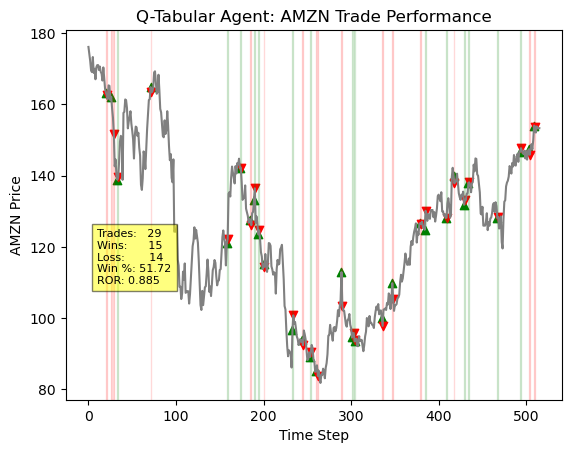

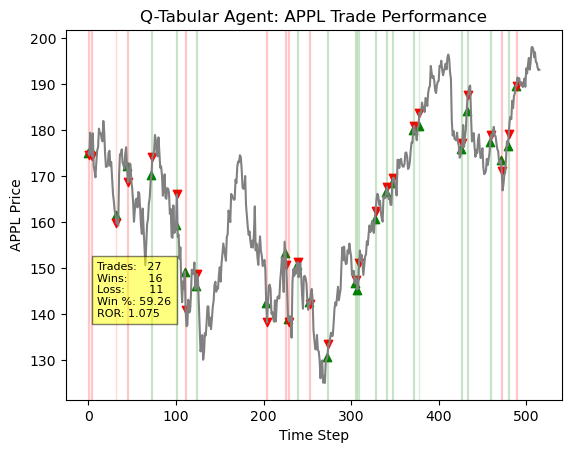

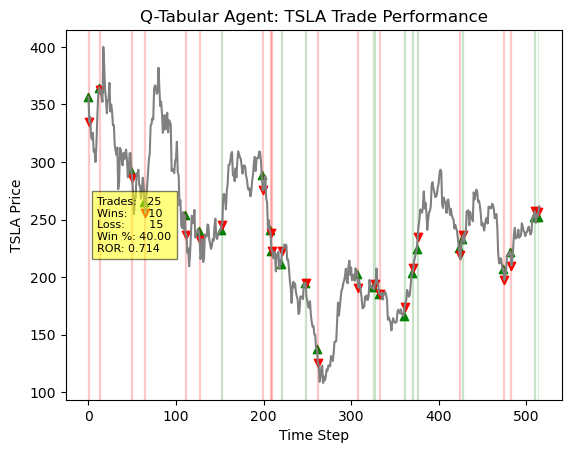

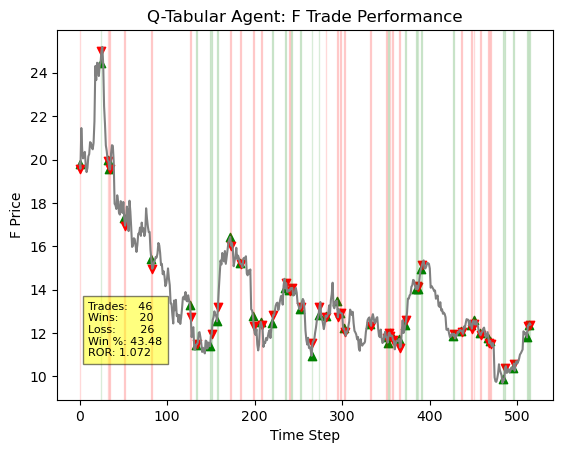

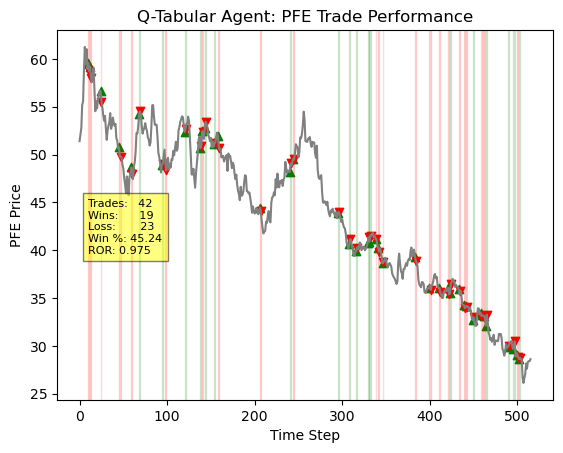

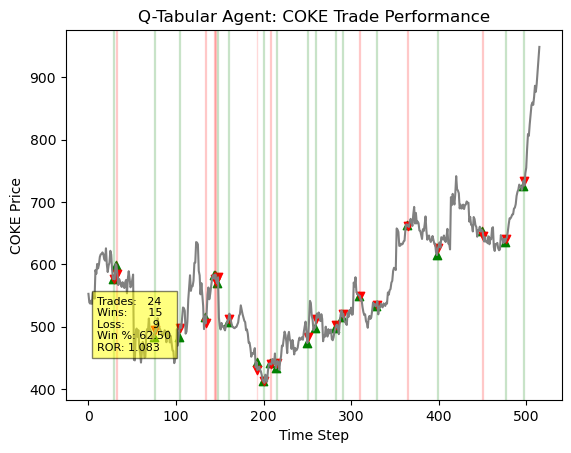

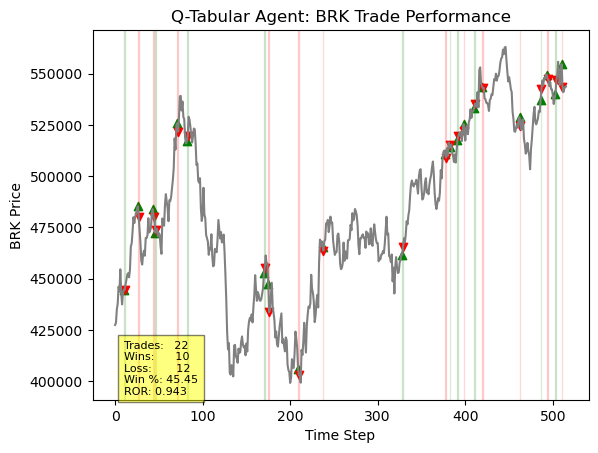

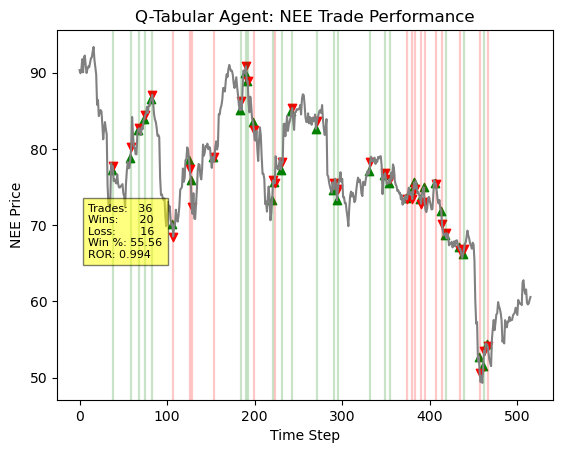

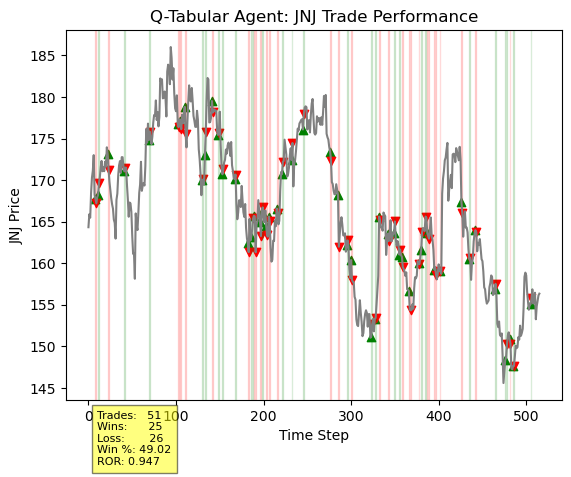

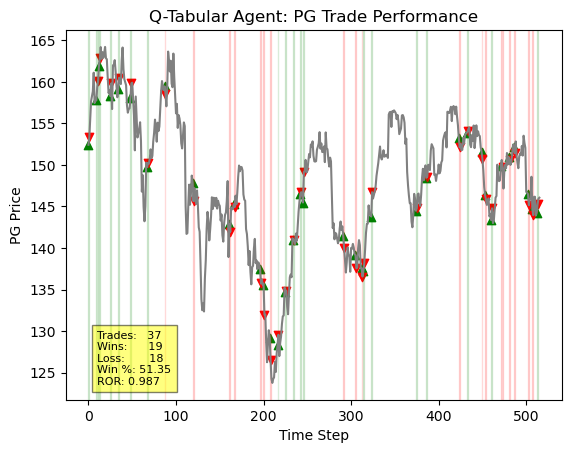

In [3]:
"Tabular Q"
import sys
pwd = "P:/dsv/DAMII/Practical Project/rl_stock_agents"
sys.path.append(pwd)

import cleandata
import numpy as np
import matplotlib.pyplot as plt
from agents import Discrete_QtabAgent

from agentperform import agent_stock_performance


stock_list =["amzn_daily.csv", "appl_daily.csv","tsla_daily.csv","f_daily.csv","pfe_daily.csv",
             "coke_daily.csv","brk_daily.csv","nee_daily.csv","jnj_daily.csv","pg_daily.csv"]

stock_name_list = ['AMZN','APPL','TSLA','F','PFE','COKE','BRK','NEE','JNJ','PG']

import_path = "P:/dsv/DAMII/Practical Project/rl_stock_agents/input_data"

ohlcv_bin_sizes = [150,30,30,150,150]
training_range = [[0,2000]]
test_range = [[2000,2516]]
epochs = 250




for file_name, stock_name in zip(stock_list,stock_name_list):
    
    # Import File
    df_ohlcv = cleandata.NASDAQ_csv_input(file_name,import_path)

    logging.info(f'Loaded File: {file_name}')
    agent = Discrete_QtabAgent(df_ohlcv,
                      ohlcv_bin_sizes,
                      training_range, 
                      epochs,
                      test_range)
    

    for start_idx, end_idx in training_range:
        
        agent.train(start_idx,end_idx,initial_epsilon = 0.75, final_epsilon = 0.1)

    
    
    for start_idx, end_idx in test_range:
        
        agent.test(start_idx,end_idx)
    
    trades_list = [entry['Action'] for entry in agent.env.step_info]
    
    trade_seq = np.array(trades_list)
    
    test_result = agent_stock_performance(df_ohlcv['close'].iloc[test_range[0][0]:test_range[0][1]].to_numpy(),trade_seq,stock_name,"Q-Tabular")

           
  
        

